<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/branch1/Repr%C3%A9sentation_du_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
data = pd.read_csv(DATA_PATH+"Tweets_parsed.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data.sample(random_state=42, n=5, replace=False)

liability  ...                                             parsed
1023           1  ...  d√©coupe morceaux disqueuse ami venait dh√©riter...
8637           1  ...  sant√© payer mutuelle gr√¢ce regroupement httpst...
6887           1  ...  chine 30 pib forme cr√©dit amazon 120 fois prof...
10861          0  ...  desident_emot_right_arrowÔ∏è paulcng l‚Äô√©mergence...
5381           1  ...  rt pierrehermefr 11 g√¢teaux chocolats forme c≈ì...

[5 rows x 6 columns]

In [3]:
data

liability  ...                                             parsed
0              1  ...             l‚Äôentretien complet httpstco0edjwyvqsm
1              1  ...  desident_emot_ballot_box_with_ballotÔ∏èpremier t...
2              1  ...  catherineavice tribune desident_emot_backhand_...
3              1  ...  desident_emot_Canada fois histoire uber eats s...
4              1  ...  desident_emot_musical_score grands artistes se...
...          ...  ...                                                ...
16890          0  ...  another reason to drink more water desident_em...
16891          0  ...     wikitips httpstcoxdce9gsn3w httpstcoy2dnfsoowe
16892          0  ...     wikitips httpstcoqvfv3yjxgg httpstcoslsyp2sime
16893          0  ...     wikitips httpstcoyuzfjn9xkq httpstcouvybonhwoi
16894          0  ...  im simultaneously intrigued and grossed out ht...

[16895 rows x 6 columns]

In [4]:
data['parsed'].tolist()

['l‚Äôentretien complet httpstco0edjwyvqsm',
 'desident_emot_ballot_box_with_ballotÔ∏èpremier tour pri desident_date relr eciotti arrive t√™te 2559 affrontera second tour vpecresse 25‚Ä¶ httpstcojcpxg2cgzi',
 'catherineavice tribune desident_emot_backhand_index_pointing_down httpstco5pzg8pno9j',
 'desident_emot_Canada fois histoire uber eats s‚Äôassocie magasin canadien tokyo smoke possible‚Ä¶ httpstcojrqhl2zeql',
 'desident_emot_musical_score grands artistes seuls profit√© quelquun √©merge si√®cles‚Ä¶ httpstcoycd6dzbmdf',
 'rt jfpoisson78 desident_emot_balance_scaleÔ∏è 2√®me contreattaque viaofficiel jai saisi conseil detat quil consid√®re ill√©gal d√©cret n¬∞ desident_date 15‚Ä¶',
 'desident_emot_no_littering l‚Äôassociation sauvage m√©diterran√©e organise ann√©e cons√©cutive chasse tr√©sor france a‚Ä¶ httpstcobhbrpwgput',
 'desident_emot_train ans lancement coop√©rative ferroviaire railcoop rouler train fret occi‚Ä¶ httpstcoxokbrv5gpf',
 'rt nicolasvdrines1 pr lascola ¬´dose3 bonne 

# S√©paration en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# X : le tweet
X = data['parsed']
# y : site fiable / pas fiable
y = data['liability_label']

In [7]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [9]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (10137,) , X_val.shape :  (3379,) , X_test.shape :  (3379,)


Visualiser le distribution de model

In [10]:
import matplotlib.pyplot as plt
import numpy as np

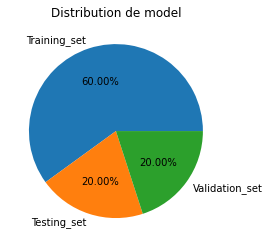

In [11]:
model_size = np.array([X_train.count(), X_test.count(), X_val.count()])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

# Bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# cr√©er un objet de CountVectorizer
countvectorizer = CountVectorizer()
# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)

In [14]:
# fonction Bag_of_words 
# Entr√©e : list de tweet
# Sortie : vecteurs de tweet
def bag_of_words(text):
  bag = countvectorizer.fit_transform(text)
  return bag

In [15]:
# un exemple de test
"""exemple = X_train[0]
exemple1 = X_train[10]
exemple2 = X_train[20]

print('exemple : ', exemple)
print('exemple1 : ', exemple1)
print('exemple2 : ', exemple2)


bag = bag_of_words([exemple, exemple1,exemple2])
bag.toarray()
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)
"""

"exemple = X_train[0]\nexemple1 = X_train[10]\nexemple2 = X_train[20]\n\nprint('exemple : ', exemple)\nprint('exemple1 : ', exemple1)\nprint('exemple2 : ', exemple2)\n\n\nbag = bag_of_words([exemple, exemple1,exemple2])\nbag.toarray()\nfeature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)\n"

In [16]:
tweet = np.array(X_train)

In [20]:
len(X_train)

10137

In [17]:
bag = countvectorizer.fit_transform(tweet)
bag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  000006  008wkg  01  0109  019  ...  ŸäÿπŸàÿØ  Ê°ÉÊ∞£‰∏ÄÈõ∂  ùí±ùìä  ùñàùñîùñëùñä  ùñïùñîùñöùñó  ùñôùñîùñöùñò
0        0       0       0   0     0    0  ...     0     0   0     0     0     0
1        0       0       0   0     0    0  ...     0     0   0     0     0     0
2        0       0       0   0     0    0  ...     0     0   0     0     0     0
3        1       0       0   0     0    0  ...     0     0   0     0     0     0
4        0       0       0   0     0    0  ...     0     0   0     0     0     0
...    ...     ...     ...  ..   ...  ...  ...   ...   ...  ..   ...   ...   ...
10132    0       0       0   0     0    0  ...     0     0   0     0     0     0
10133    0       0       0   0     0    0  ...     0     0   0     0     0     0
10134    0       0       0   0     0    0  ...     0     0   0     0     0     0
10135    0       0       0   0     0    0  ...     0     0   0     0     0     0
10136    0       0       0   0     0    0  ...     0     0   0     0     0     0

[10137 rows x 38118 columns]

In [19]:
len(tweet)

10137

In [17]:
text = []
for tweet in X_train:
  text.append(tweet)
print(text)

bag = bag_of_words(text)
bag.toarray()

['jura vivent pass sanitaire sen portent desident_emot_backhand_index_pointing_right httpstcob1bk7sygnu passsanitaire vaccinationcovid covid19', 'rt mdemeaux toul desident_emot_right_arrowÔ∏è bar ferm√© desident_date nonrespect pass sanitaire httpstcodv7mtvz10g', 'rt morandiniblog twitter victime desident_date cyberattaque histoire gros comptes certifi√©s pirat√©s ce‚Ä¶', 'l‚Äôoms pr√©voitelle 236 000 d√©c√®s covid19 europe d‚Äôici 1er desident_date httpstcoqoeepoa6xs', 'presse oc√©an desident_emot_newspaper desident_date 31 desident_date journal lire version num√©rique ici desident_emot_backhand_index_pointing_right‚Ä¶ httpstcoh2qxh9nzlo', 'desident_emot_movie_camera desident_date politique covid19 passeportsanitaire couru davance ma√Ætre fabrice di vizio ‚Ä¶ httpstcoz7ylgi5s7k', 'desident_emot_red_circle coronavirus desident_emot_France france bilan 0807 desident_date 5 728 837 cas covid19 4 442 nouveaux cas 110 344 d√©c√®s 25‚Ä¶ httpstcovjzswmlfya', '√©dulcorants nocifs flore intest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['parsed'].tolist())

In [50]:
featured_names = vectorizer.get_feature_names()
print(f'Feature names \n{featured_names}')
# matrix = X.todense()
# denseliste = matrix.tolist()
# df = pd.DataFrame(denseliste, columns=featured_names)
# print(f'Final result of TF-IDF \n{df}')

Feature names 
['00', '000', '000006', '008wkg', '01', '0109', '019', '02', '025', '0307', '037', '0405', '05', '06', '068', '07', '08', '080519', '0807', '085', '09', '0day', '10', '100', '1000', '100000', '1000e', '100620', '100m2', '100s', '100√®me', '101', '102', '103√®me', '105', '107', '108', '1080p', '1088', '1095', '10bn', '10e', '10h', '10h30', '10h35', '10h40', '10millionsdepauvres', '10x', '10√®me', '11', '110', '11000', '110m', '111', '1111', '1112', '112', '1124', '113', '1130', '1135', '114', '1142', '114m', '115', '116', '11a', '11day', '11e', '11h', '11h15', '11h30', '11h45', '11√®', '12', '120', '1200', '12000', '120000', '1200000000000', '1200kg', '120k', '12132019', '1214', '1214h', '1217', '1218', '123', '124', '125', '1250000', '125j', '126', '12764', '127e', '128', '129', '1295', '129774', '12e', '12h', '12h30', '12hjour', '12le', '12tn', '13', '130', '1300', '131', '132', '1335', '135', '136', '137', '138', '13e', '13h', '13h30', '13hsopo', '13k', '14', '140', '1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(vectorizer.get_feature_names_out())
print('\n')
print(X.shape)

['00' '000' '000006' ... 'ùñàùñîùñëùñä' 'ùñïùñîùñöùñó' 'ùñôùñîùñöùñò']


(16895, 55536)


In [52]:
test = 0
for item in featured_names:
  if ((item[0] == '0') or (item[0] == '1') or (item[0] == '2') or (item[0] == '3') or (item[0] == '4') or (item[0] == '5') or (item[0] == '6') or (item[0] == '7') or (item[0] == '8') or (item[0] == '9')):
    test = test + 1
print(test)

771


#A faire

Nettoyage de tous les tweets maintenant (lancer la nuit)

pour les tweets d'entrainement : faire un sample sur tous les tweets, pas grave si r√©partition al√©atoire